In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
!pip install kemlglearn --upgrade --quiet
#!pip install scikit-learn --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00


# Dimensionality Reduction

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from kemlglearn.datasets import make_blobs
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap, TSNE

import keras
from keras import layers
from sklearn.datasets import make_moons

## Linear data

Now we will use different methods of dimensionalty reduction using some specific examples.

The first one consists of three spherical blobs with different variances.

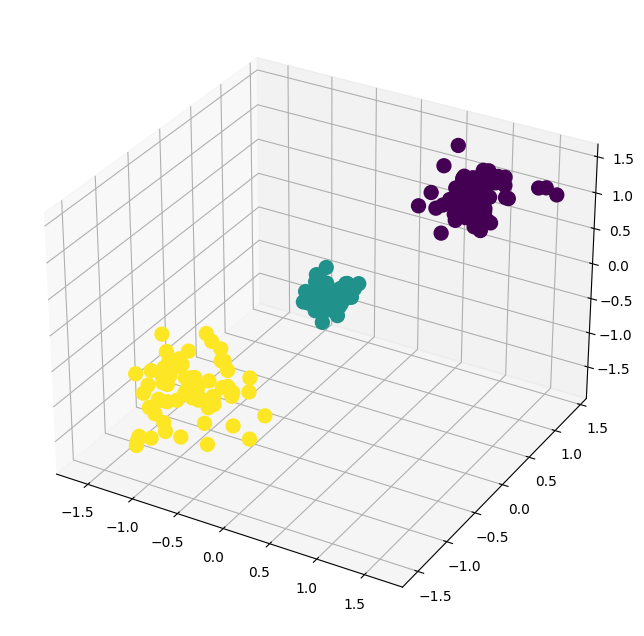

In [3]:
blobs, labels = make_blobs(n_samples=200, n_features=3, centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.2,0.1,0.3])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=labels, s=100);

### PCA

Computing PCA we can see that just one component explains almost all the variance.

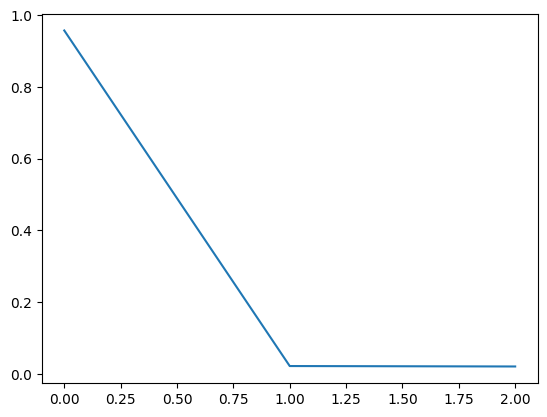

In [4]:
pca = PCA()
fdata = pca.fit_transform(blobs)
fig = plt.figure()
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_);

And as we can expect representing the PCA transformed data we can see that just one dimension is enough

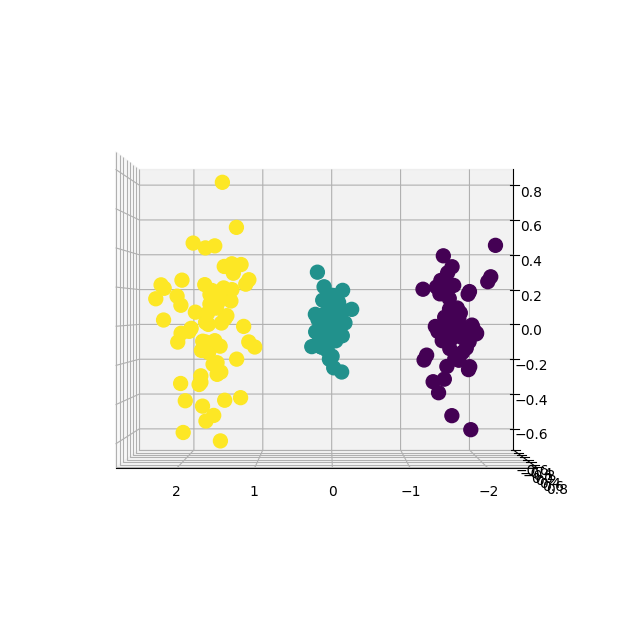

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 90)
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=labels,s=100);

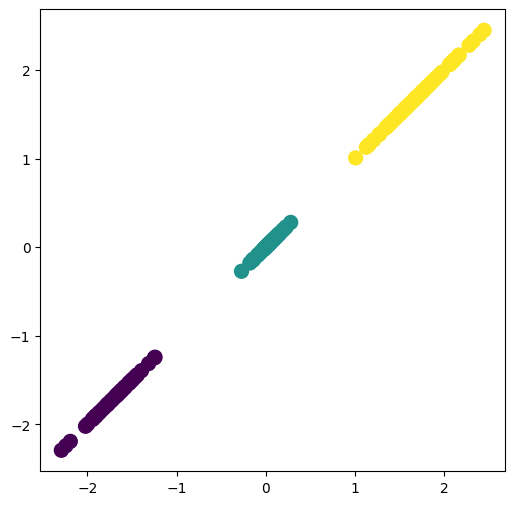

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.scatter(fdata[:, 0], fdata[:, 0], c=labels,s=100);

### ISOMAP & LLE

Using nonlinear transformations to linearly separable data sometimes has weird consequences.

First we see what happens using ISOMAP

interactive(children=(IntSlider(value=5, description='nn', max=85, min=5, step=10), Output()), _dom_classes=('…

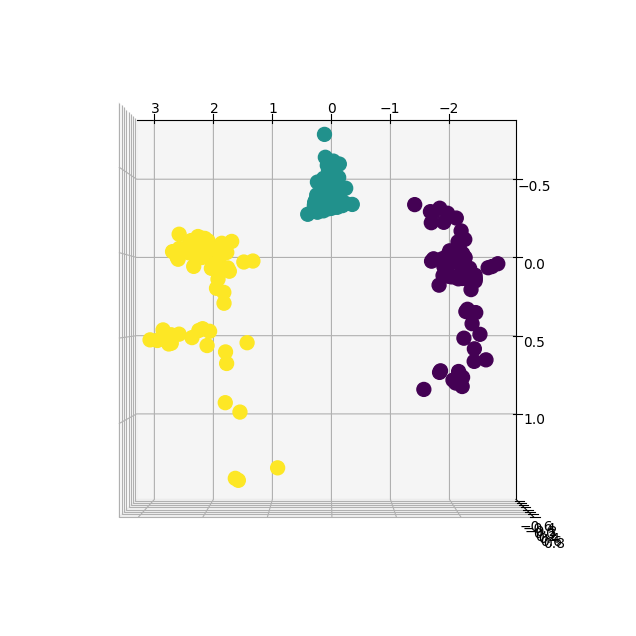

In [7]:
@interact(nn = (5, 85, 10))
def g(nn=5):
    iso = Isomap(n_components=3, n_neighbors=nn)
    fdata = iso.fit_transform(blobs)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(90, 90)
    plt.scatter(fdata[:, 0], fdata[:, 1], zs= fdata[:, 2], depthshade=False, c=labels, s=100);

Changing the number of neigbors can change radically the result, but as they increase the transformation is equivalent to PCA

Now for Locally Linear Embedding

interactive(children=(IntSlider(value=5, description='nn', max=85, min=5, step=10), Output()), _dom_classes=('…

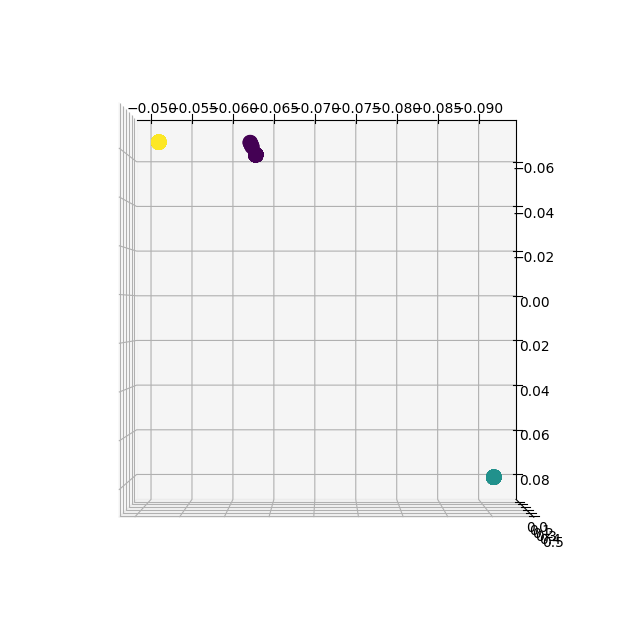

In [8]:
@interact(nn = (5, 85, 10))
def g(nn=5):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=3, method='standard')
    fig = plt.figure(figsize=(8,8))
    fdata = lle.fit_transform(blobs)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(90, 90)
    plt.scatter(fdata[:, 0], fdata[:, 1], zs= fdata[:, 2], depthshade=False, c=labels, s=100);

### Autoencoder

If we train an autoencoder with linear activations and layer sizes 3-2-3, we can obtain a representation that will be equivalent as PCA. After training we only need to keep the encoder for performing the transformation

In [9]:
input = keras.Input(shape=(3,))
encoded = layers.Dense(2, activation='linear')(input)
decoded = layers.Dense(3, activation='linear')(encoded)

autoencoder = keras.Model(input, decoded)
encoder = keras.Model(input, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(blobs, blobs, epochs=50, batch_size=32, shuffle=True, verbose=False)

7/7 [==============================] - 0s 3ms/step


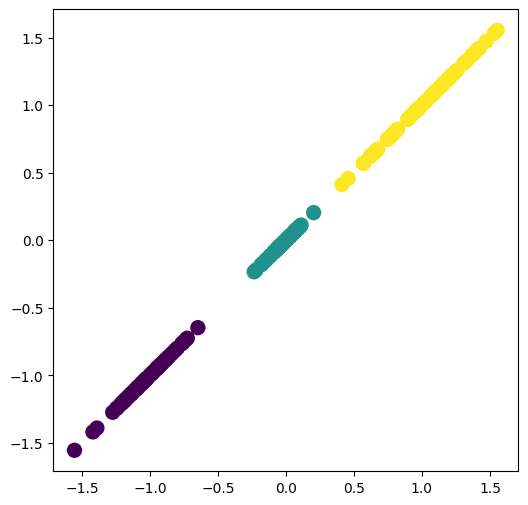

In [10]:
eblobs = encoder.predict(blobs)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.scatter(eblobs[:, 0], eblobs[:, 0], c=labels,s=100);

## Nonlinear data

Now we will play with non linearly separable data. First the two moons dataset.

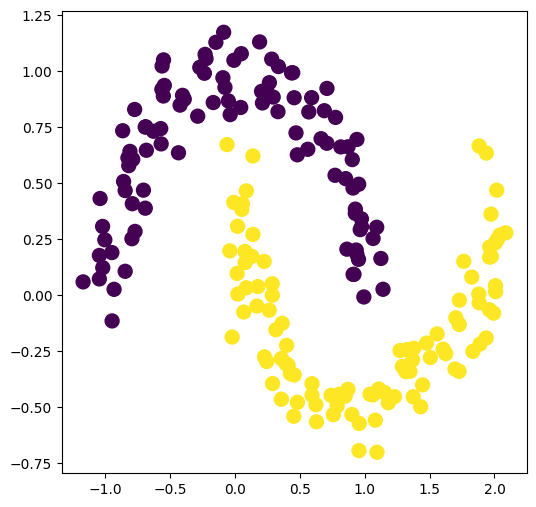

In [11]:
moons, labelsm = make_moons(n_samples=200, noise=0.1)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.scatter(moons[:, 0], moons[:, 1], c=labelsm, s=100);

### PCA

PCA assigns most of the variance to the fist component, but the second one has still a significan amount

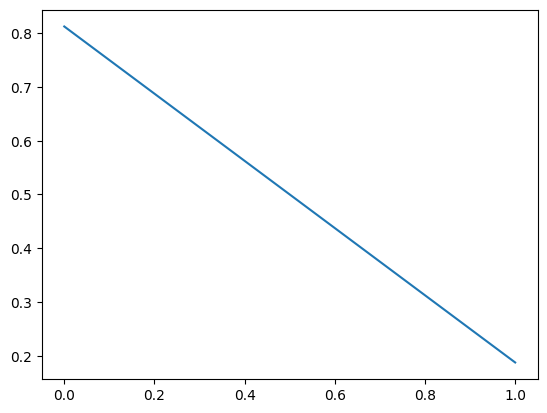

In [12]:
pca = PCA()
fdata = pca.fit_transform(moons)
#print(pca.explained_variance_ratio_)
fig = plt.figure()
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_);

And PCA does not seems to have much effect on the data

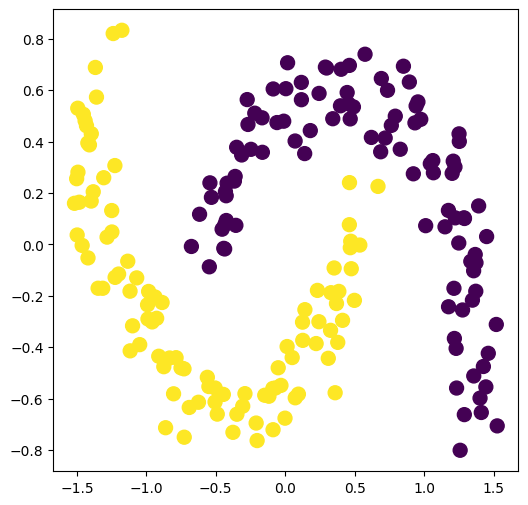

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.scatter(fdata[:, 0], fdata[:, 1], c=labelsm,s=100);

### ISOMAP

ISOMAP does a better job, but adjusting an adequate of neighbors to sparate the two moons requires some experimentation. Playing with the number of neighbors will results on different shapes that will converge on the original data for large values

interactive(children=(IntSlider(value=5, description='nn', max=15, min=1, step=2), Output()), _dom_classes=('w…

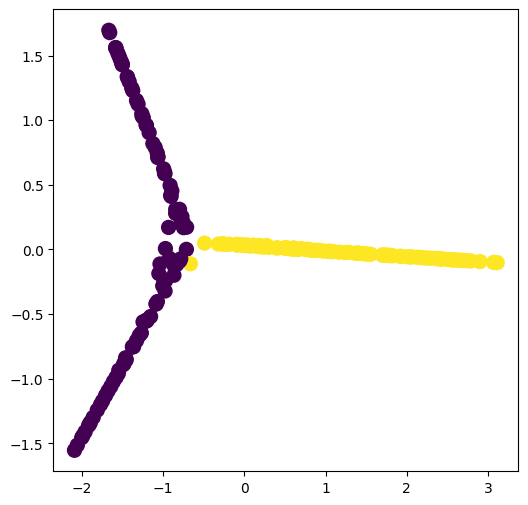

In [14]:
@interact(nn = (1, 15, 2))
def g(nn=5):
    iso = Isomap(n_components=2, n_neighbors= nn)
    fdata = iso.fit_transform(moons)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.scatter(fdata[:, 0], fdata[:, 1], c=labelsm, s=100);

### LLE

LLE also allows  separating both moons resulting in very different transformations depending on the number of neighbors.

interactive(children=(IntSlider(value=5, description='nn', max=15, min=1, step=2), Output()), _dom_classes=('w…

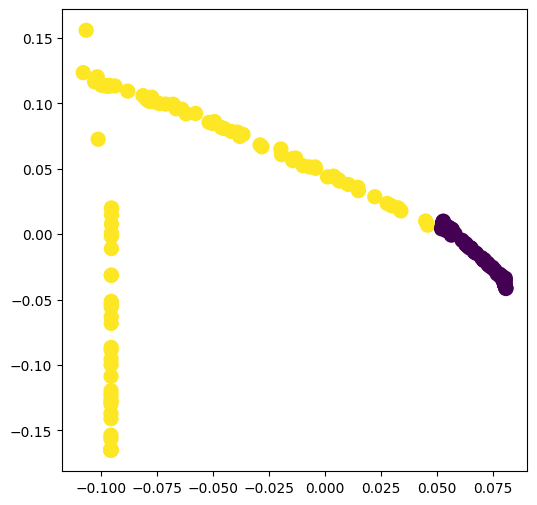

In [15]:
@interact(nn = (1, 15, 2))
def g(nn=5):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=2, method='standard', random_state=0)
    fig = plt.figure(figsize=(6,6))
    fdata = lle.fit_transform(moons)
    print (lle.reconstruction_error_)
    ax = fig.add_subplot(111)
    plt.scatter(fdata[:, 0], fdata[:, 1],  c=labelsm, s=100);

## TSNE

t-sne is some times difficult to tune, but it can result in interesting representations

interactive(children=(IntSlider(value=30, description='pp', max=50, min=10, step=5), Output()), _dom_classes=(…

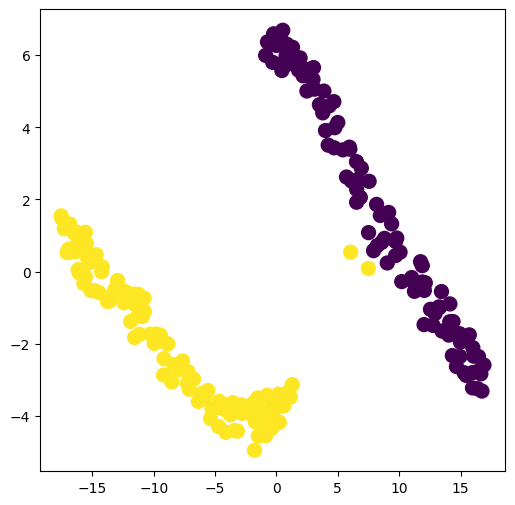

In [16]:
@interact(pp = (10, 50, 5))
def g(pp=30):
    tsne = TSNE(perplexity=pp, random_state=0)
    fig = plt.figure(figsize=(6,6))
    fdata = tsne.fit_transform(moons)
    ax = fig.add_subplot(111)
    plt.scatter(fdata[:, 0], fdata[:, 1],  c=labelsm, s=100);

## Autoencoders

We can also train an autoencoder with non linear activation functions so we obtain a non linear representation. In this case the input and the transformed spaces have the same number of dimensions so the results with a simple 2-2-2 architecture are not very good

interactive(children=(Dropdown(description='act', options=('relu', 'sigmoid', 'tanh'), value='relu'), Output()…

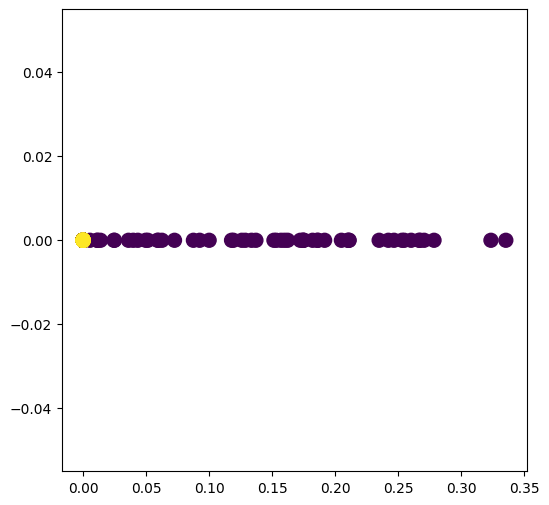

In [17]:
@interact(act = ['relu', 'sigmoid', 'tanh'])
def g(act='relu'):

    input = keras.Input(shape=(2,))
    encoded = layers.Dense(2, activation=act)(input)
    decoded = layers.Dense(2, activation='linear')(encoded)

    autoencoder = keras.Model(input, decoded)
    encoder = keras.Model(input, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(moons, moons, epochs=100, batch_size=32, shuffle=True, verbose=False)

    emoons = encoder.predict(moons)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.scatter(emoons[:, 0], emoons[:, 1], c=labelsm,s=100);